# PREPARATION

In [10]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd '/content/drive/MyDrive/memoire'

/content/drive/MyDrive/memoire


In [12]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# CALCULATE COHEN'S KAPPA

In [28]:
#mnli
mnli = './data_annote/v_final/mnli_negative_1to4pairs_sampled_label_neg_only.tsv'
dataset_mnli = load_dataset('csv', data_files = mnli, sep= '\t')
dataset_mnli

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-74f4d06fef3eb9a6/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'index', 'text', 'correct', 'hypothesis', 'correct.1', 'label1', 'label2', 'gold_label '],
        num_rows: 300
    })
})

In [31]:
# snli
snli = './data_annote/v_final/snli_negative_1to4pairs_sampled_label_neg_only.tsv'
dataset_snli = load_dataset('csv', data_files = snli, sep= '\t')
dataset_snli

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-1587b8a876e373b1/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'index', 'text', 'correct', 'hypothesis', 'correct.1', 'label1', 'label2', 'gold_label'],
        num_rows: 300
    })
})

In [32]:
# rte
rte = './data_annote/v_final/rte_negative_1to4pairs_sampled_label_neg_only.tsv'
dataset_rte = load_dataset('csv', data_files = rte, sep= '\t')
dataset_rte

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-c1c13333b9c8823c/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'index', 'text', 'correct', 'hypothesis', 'correct.1', 'label1', 'label2', 'gold_label'],
        num_rows: 300
    })
})

In [29]:
label_mnli_v1 = dataset_mnli['train']['label1']
label_mnli_v2 = dataset_mnli['train']['label2']

In [33]:
label_snli_v2 = dataset_snli['train']['label1']
label_snli_v1 = dataset_snli['train']['label2']

In [34]:
label_rte_v1 = dataset_rte['train']['label1']
label_rte_v2 = dataset_rte['train']['label2']

In [30]:
cohen_kappa_mnli = cohen_kappa_score(label_mnli_v1, label_mnli_v2)
cohen_kappa_mnli

0.8525617397714707

In [35]:
cohen_kappa_snli = cohen_kappa_score(label_snli_v1, label_snli_v2)
cohen_kappa_snli

0.8228137181556877

In [36]:
cohen_kappa_rte = cohen_kappa_score(label_rte_v1, label_rte_v2)
cohen_kappa_rte

0.9104424144725058

In [37]:
confusion_matrix(label_mnli_v1, label_mnli_v2)

array([[ 90,   3,   0],
       [  0,  52,   9],
       [  1,  15, 130]])

In [38]:
# confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Input
    - cm : confusion matrix
    - classes : number of class
    - normalize : True: percentage, False:number
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 90   3   0]
 [  0  52   9]
 [  1  15 130]]


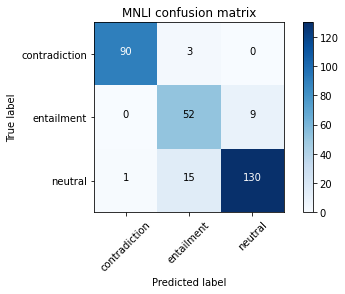

In [39]:
cm_mnli = confusion_matrix(label_mnli_v1, label_mnli_v2)
plot_confusion_matrix(cm_mnli, classes=["contradiction", "entailment", "neutral"], normalize=False, title='MNLI confusion matrix')

Confusion matrix, without normalization
[[ 60   2   4]
 [  3  44  15]
 [  1   5 166]]


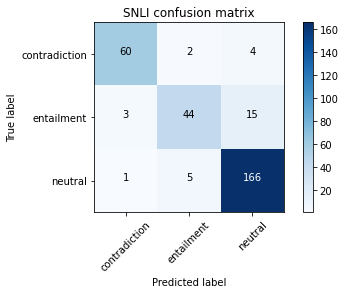

In [40]:
cm_snli = confusion_matrix(label_snli_v1, label_snli_v2)
plot_confusion_matrix(cm_snli, classes=["contradiction", "entailment", "neutral"], normalize=False, title='SNLI confusion matrix')

Confusion matrix, without normalization
[[ 69   0]
 [ 10 221]]


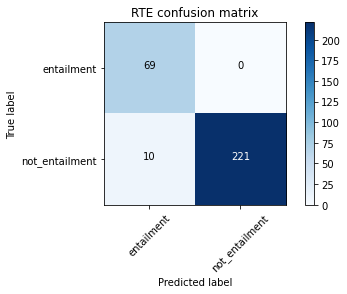

In [41]:
cm_rte = confusion_matrix(label_rte_v1, label_rte_v2)
plot_confusion_matrix(cm_rte, classes=["entailment", "not_entailment"], normalize=False, title='RTE confusion matrix')